# Unsupervising Learning Capstone


## Reach Question: 

### A company wants to segment its shoppers

## Dataset: Online Shoppers Purchasing Intention [Source](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

In [118]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import normalize

from sklearn import metrics
from sklearn import ensemble

from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth,SpectralClustering
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN


from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline


#Setting colors for visualizations

palette = 'pastel'
palette2 = 'bright'

In [119]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Exploration

|           DATA             |               |
|----------------------------|---------------|
| Number of Instances        | 12330         |
| Number of Attributes:      | 18            |
| Attribute Characteristics: | Integer, Real |

### Types of variables


In [120]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Description of columns

- Administrative, Informational, ProductRelated: Represent the number of different types of pages visited by the visitor in that session

- Administrative_Duration, Informational_Duration, ProductRelated_Duration: Represents the total time spent in each of  page categories (mentioned above)

- BounceRates: Refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session

- ExitRates: is the percentage of exits on a page

- PageValues: represent the metrics measured by "Google Analytics" for each page in the e-commerce site

- SpecialDay: indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction

- VisitorType: There two, "New visitor" and "Returning Visitor"

- Weekend: It's a Boolean value indicating whether the date of the visit is weekend

- Month, OperatingSystems, Browser, Region and TrafficType


Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


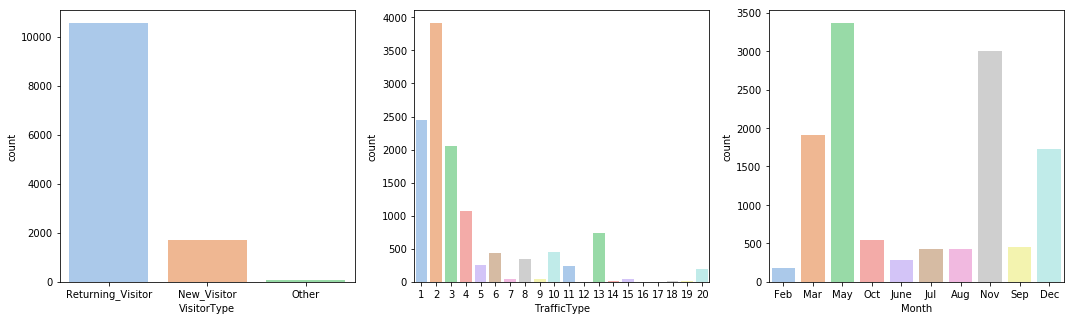

In [121]:
# Visualization for categorical variables

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)

print(df.VisitorType.value_counts())
sns.countplot(x=df['VisitorType'], palette = palette, data=df)

plt.subplot(1,3,2)
df.Revenue.value_counts()
sns.countplot(df['TrafficType'], palette = palette)

plt.subplot(1,3,3)
df.Month.value_counts()
sns.countplot(df['Month'], palette = palette)

plt.show()


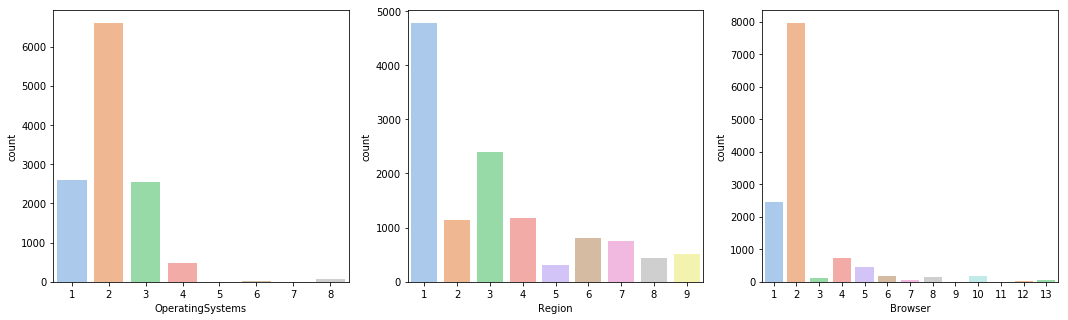

In [122]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x=df['OperatingSystems'], palette = palette, data=df)

plt.subplot(1,3,2)
sns.countplot(df['Region'], palette = palette,  data=df)

plt.subplot(1,3,3)
sns.countplot(df['Browser'], palette = palette,  data=df)


plt.show()

In [123]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


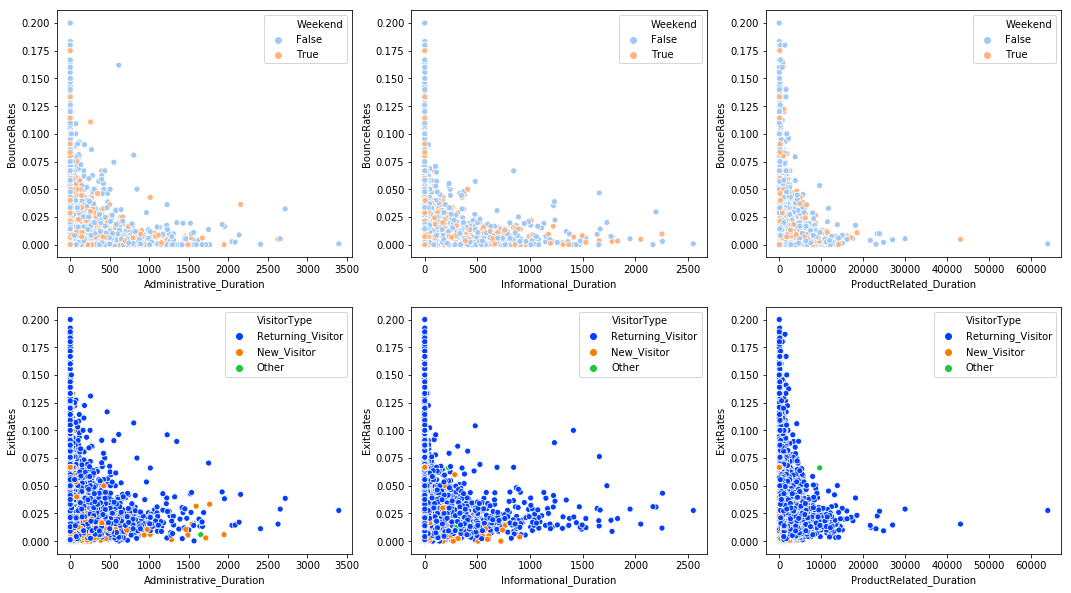

In [124]:
#Administrative, informational and Product duration vs Bounce and Exit Rates
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.scatterplot(x='Administrative_Duration',y='BounceRates',
                hue="Weekend",data=df, palette = palette)

plt.subplot(2,3,2)
sns.scatterplot(x='Informational_Duration', y='BounceRates',
                hue="Weekend",data=df, palette = palette)

plt.subplot(2,3,3)
sns.scatterplot(x='ProductRelated_Duration', y='BounceRates',
                hue="Weekend", data=df, palette = palette)

plt.subplot(2,3,4)
sns.scatterplot(x='Administrative_Duration', y='ExitRates',
                hue="VisitorType",data=df, palette = palette2)

plt.subplot(2,3,5)
sns.scatterplot(x='Informational_Duration', y='ExitRates',
                hue="VisitorType",data=df, palette = palette2)

plt.subplot(2,3,6)
sns.scatterplot(x='ProductRelated_Duration', y='ExitRates',
                hue="VisitorType", data=df, palette = palette2)

plt.show()

In [125]:
#Create a new variable with Total Duration browsing the website

df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

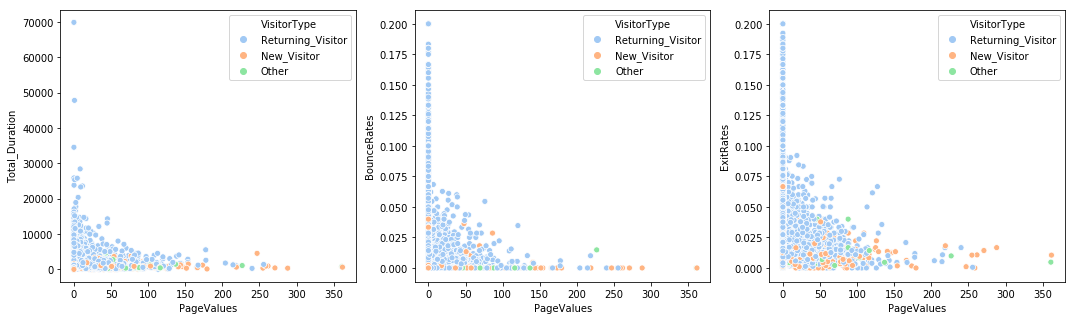

In [126]:
#Total_Duration,BounceRates, ExitRates vs PageValues
#Page Value is the average value for a page that a user visited 
#before landing on the goal page or completing an Ecommerce transaction (or both)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(x='PageValues', y='Total_Duration',
                hue='VisitorType', data=df, palette = palette)

plt.subplot(1,3,2)
sns.scatterplot(x='PageValues', y='BounceRates',
                hue="VisitorType",data=df, palette = palette)

plt.subplot(1,3,3)
sns.scatterplot(x='PageValues', y='ExitRates',
                hue="VisitorType", data=df, palette = palette)

plt.show()

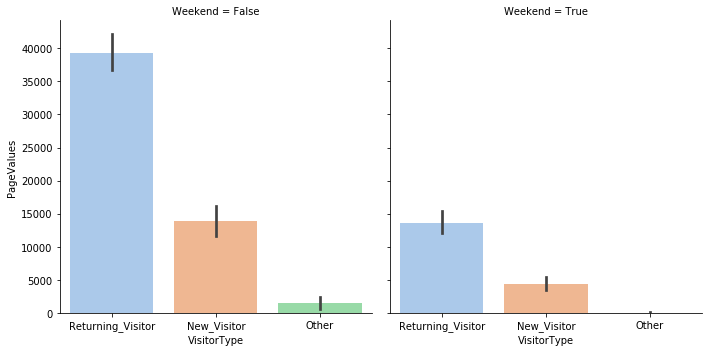

In [127]:
sns.catplot(x='VisitorType', y='PageValues',  kind="bar", 
            data=df, palette = palette, estimator=sum, col="Weekend")


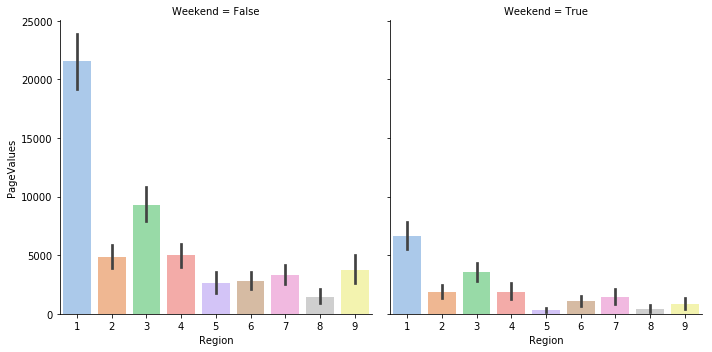

In [128]:
sns.catplot(x='Region', y='PageValues',  kind="bar", 
            data=df, palette = palette, estimator=sum, col="Weekend")


## Data Cleaning

Null values are in yellow


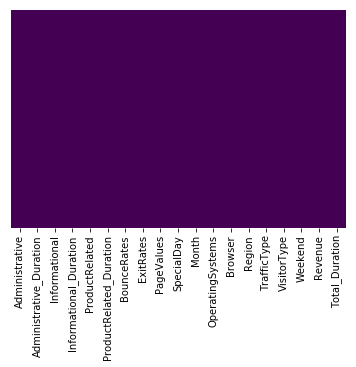

In [129]:
#Look for null values

print('Null values are in yellow')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [130]:
#Functions to convert categorical to numeric variables

def Converterm(val):
    
    months = {'Jan':1,'Feb':2,'Mar':3,
              'Apr':4,'May':5,'June':6,
              'Jul':7,'Aug':8,'Sep':9,
              'Oct':10,'Nov':11,'Dec':12}
    
    return months[val] if val in months else 0
    

def ConverterVisitor(val):

    visitor = {'New_Visitor':1,'Returning_Visitor':2}    
    return 1 if val not in visitor else visitor[val] 
        

def ConverterBoolean(val):
    
    return 1 if val else 0



In [131]:
#Convert string to numeric values    

df['VisitorType'] = df['VisitorType'].apply(ConverterVisitor)
df['Month'] = df['Month'].apply(Converterm)
df['Weekend'] = df['Weekend'].apply(ConverterBoolean)
df['Revenue'] = df['Revenue'].apply(ConverterBoolean)

### Feature Selection

In [132]:
selectedFeatures = [ 'ProductRelated','Total_Duration',
                    'ProductRelated_Duration', 'BounceRates', 
                    'PageValues', 'Month', 'VisitorType']

## Clustering Models

### Approach 1 : K-Means Model 

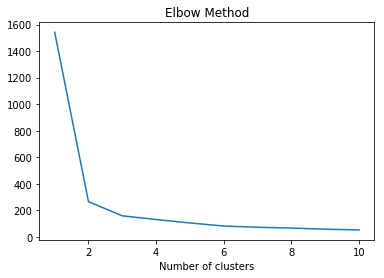

In [137]:
#Elbow method to confirm number of clusters

X = np.array(df[selectedFeatures])


X_normalized = preprocessing.normalize(X)

wcss = []
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [138]:
#KMeans Algorithm

X = np.array(df[selectedFeatures])

# kmeans Model
kmeans = KMeans(n_clusters=2, random_state=42, n_jobs=2)
y_kmeans = kmeans.fit_predict(X)

df['cluster_kmeans'] = y_kmeans

#For metrics purpose
algorithms = {}
algorithms['kmeans_1'] = kmeans



In [145]:
from sklearn.decomposition import PCA
# Normalize the data.
X_norm = normalize(X)
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)


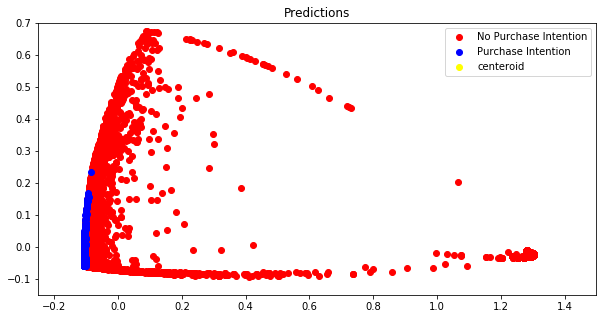

In [141]:
plt.figure(figsize=(10,5))

plt.title('Predictions')
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], 
            c='red', label = 'No Purchase Intention')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], 
            c='blue', label = 'Purchase Intention')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  
            c = 'yellow' , label = 'centeroid')
plt.xlim(-0.25, 1.5)
plt.ylim(-0.15, 0.7)
plt.legend()

plt.show()

### Approach 2 : K-Means Model with 4 cluster

In [170]:
#KMeans Algorithm

X = np.array(df[selectedFeatures])

# kmeans Model
kmeans2 = KMeans(n_clusters=4, random_state=42, n_jobs=2)
y_kmeans2 = kmeans2.fit_predict(X)

df['cluster_kmeans2'] = y_kmeans2

#For metrics purpose
algorithms['kmeans_2'] = kmeans2



In [171]:
from sklearn.decomposition import PCA
# Normalize the data.
X_norm = normalize(X)
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)



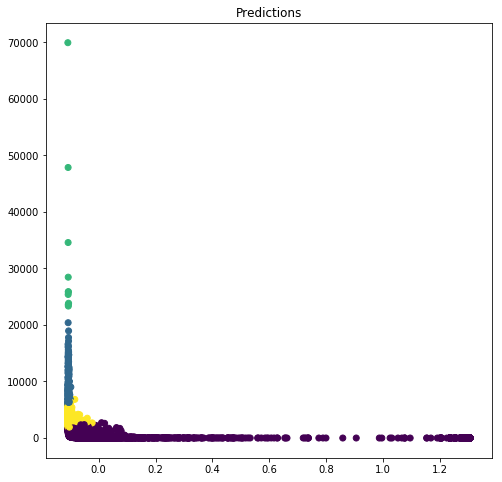

In [172]:
plt.figure(figsize=(8,8))
plt.title('Predictions')
plt.scatter(X_pca[:, 0], X[:, 1], c=y_kmeans2)
plt.show()

### Approach 3: Agglomerative Algorithm

In [178]:
#Agglomerative Algorithm

#Set X and y
X = np.array(df[selectedFeatures])

agglomerativeC = AgglomerativeClustering(linkage="ward", 
                                         affinity='euclidean',n_clusters=4, 
                                         compute_full_tree='auto')

y_agglomerative = agglomerativeC.fit_predict(X)

df['c_agglomerative'] = y_agglomerative
algorithms['agglomerative'] = agglomerativeC


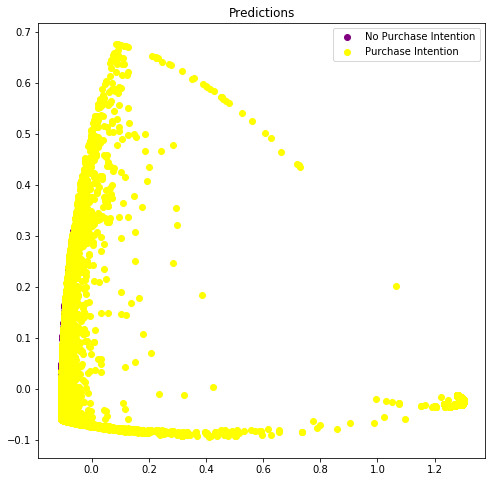

In [177]:
#Plot Solution
plt.figure(figsize=(8,8))


plt.title('Predictions')
plt.scatter(X_pca[y_agglomerative == 0, 0], X_pca[y_agglomerative == 0, 1], 
            c='purple', label = 'No Purchase Intention')
plt.scatter(X_pca[y_agglomerative == 1, 0], X_pca[y_agglomerative == 1, 1], 
            c='yellow', label = 'Purchase Intention')
plt.legend()



plt.show()

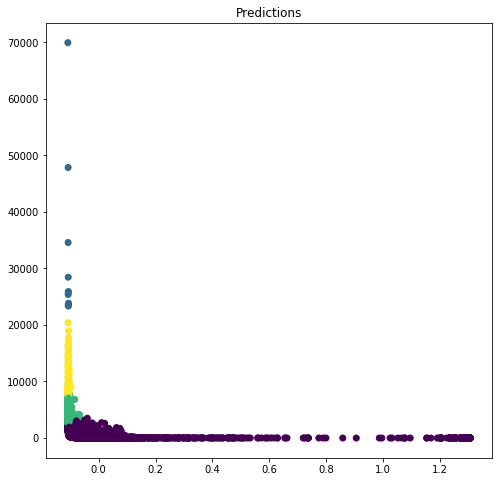

In [179]:
plt.figure(figsize=(8,8))
plt.title('Predictions')
plt.scatter(X_pca[:, 0], X[:, 1], c=y_agglomerative)
plt.show()

In [115]:
print(classification_report(df['Revenue'],agglomerativeC.labels_))

              precision    recall  f1-score   support

           0       0.73      0.12      0.21     10422
           1       0.14      0.75      0.23      1908

    accuracy                           0.22     12330
   macro avg       0.43      0.44      0.22     12330
weighted avg       0.64      0.22      0.22     12330



### Approach 3: DBSCAN Algorithm

In [185]:
# DBSCAN Algorithm

X = np.array(df[selectedFeatures])
y = np.array(df['Revenue'])

#dbscan = DBSCAN(eps=0.3, min_samples=110)
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_DBSCAN = dbscan.fit_predict(X)

df['DBSCAN'] = y_DBSCAN

# For metrics purpose
algorithms['DBSCAN'] = dbscan

# Check the solution against the data.
print('Comparing spectral clusters against the data:')
print(pd.crosstab(df['Revenue'],df['DBSCAN']))

Comparing spectral clusters against the data:
DBSCAN    -1    0    1    2    3    4    5    6    7    8  ...    13   14  \
Revenue                                                    ...              
0        9751   31   21  108    5  149   35    8    6   10 ...    13   89   
1        1906    0    0    0    0    0    0    0    0    0 ...     0    1   

DBSCAN    15   16   17   18   19   20   21   22  
Revenue                                          
0          6    8   12   16   73   17   23    8  
1          0    0    1    0    0    0    0    0  

[2 rows x 24 columns]


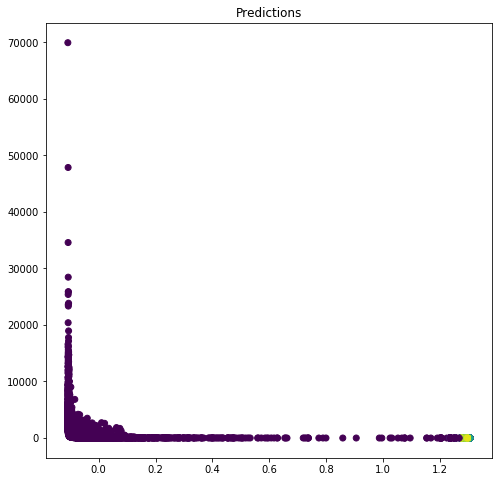

In [186]:
plt.figure(figsize=(8,8))
plt.title('Predictions')
plt.scatter(X_pca[:, 0], X[:, 1], c=y_DBSCAN)
plt.show()

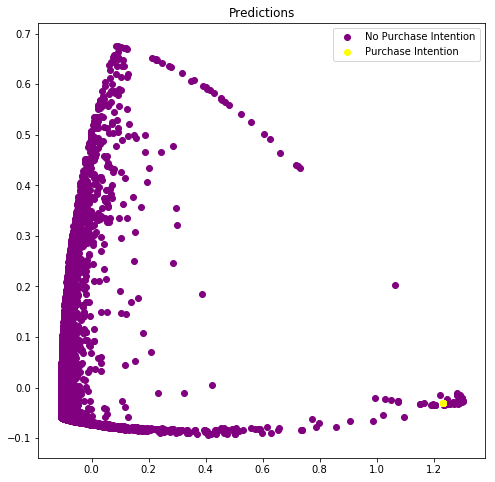

In [187]:
#Plot Solution
plt.figure(figsize=(8,8))


plt.title('Predictions')
plt.scatter(X_pca[y_DBSCAN == -1, 0], X_pca[y_DBSCAN == -1, 1], c='purple', label = 'No Purchase Intention')
plt.scatter(X_pca[y_DBSCAN == 0, 0], X_pca[y_DBSCAN == 0, 1], c='yellow', label = 'Purchase Intention')

plt.legend()


plt.show()

### Metrics

#### Adjusted Rand Score (ARS):

Adjusted Rand Score on the other hand, computes a similarity measure between two clusters. ARS considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusters.

#### Normalized Mutual Information (NMI)

Mutual Information of two random variables is a measure of the mutual dependence between the two variables.



#### Average Score

The sum of the two scores (ARS + NMI) divided 2

In [188]:
# Fit all models
results = []

for model in algorithms.values():
    model.fit(np.array(df[selectedFeatures]))
    results.append(list(model.labels_))
    

In [189]:
nmi_results = []
ars_results = []

y_true_val = list(y)

# Append the results into lists

for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred, average_method='arithmetic'))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))
                  

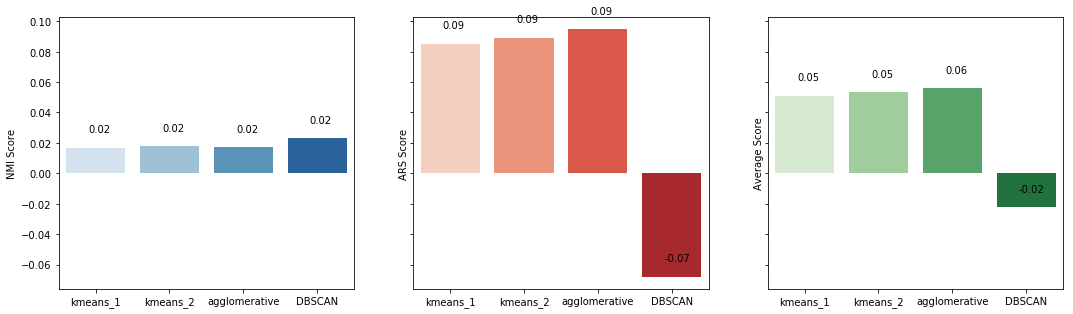

In [191]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))

numberModels = 4

x = np.arange(numberModels)
avg = [sum(x) / 2 for x in zip(nmi_results, ars_results)]

xlabels = list(algorithms.keys())

sns.barplot(x, nmi_results, palette='Blues', ax=ax1)
sns.barplot(x, ars_results, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

# Add ylabels
ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')
ax3.set_ylabel('Average Score')

# Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
plt.show()

### Questions to answer

- Your end-user and the value your project provides to them.
- Quantifiable results based on the research you’ve conducted.
- The visuals you chose and what they represent for your research.
- Next steps you'd take to expand on your work.
- A specified research question your model addresses.
- How you chose your model specification and what alternatives you compared it to.
- The practical uses of your model for an audience of interest.
- Any weak points or shortcomings of your model.

--------------------

By: Wendy Navarrete

October 2019